In [1]:
import pandas as pd
import scipy.io
import numpy as np
import scipy.sparse
import os
import src.preprocessing.data_cleaning as data_cleaning
import src.preprocessing.normalization as normalization
import src.preprocessing.feature_selection as feature_selection
import src.preprocessing.dim_reduction as dim_reduction
import src.analysis.clustering as clustering
import src.analysis.cell_identification as cell_identification
import src.evaluation.evaluation as evaluation

def load_results(results_path, tissue):
    """
    Load and display the first rows of the saved results CSV.

    Parameters:
    -----------
    results_path : str
        The base directory where results are stored.
    tissue : str
        The tissue type for which results are to be loaded.

    Returns:
    --------
    pd.DataFrame
        The loaded results dataframe.
    """
    results_file_path = f'{results_path}/{tissue}_results/{tissue}_all_results.csv'
    
    if os.path.exists(results_file_path):
        df = pd.read_csv(results_file_path)
        return df
    else:
        print(f"File not found: {results_file_path}")
        return None

C:\Users\34659\PycharmProjects\master_thesis\scRNAseq_across_human_tissues\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import src.visualization.results_visualization as visualization
from importlib import reload

In [2]:
PBMC_results = load_results("./results", "PBMC")
print("Results loaded")

Results loaded


In [3]:
print(PBMC_results.iloc[-1])

pipeline_id                                           CC_NB_SGbV_TSNE_EC_MBA
barcodes                   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...
clusters                   1,0,2,0,0,0,1,0,1,1,0,2,2,2,0,3,2,0,1,3,1,0,0,...
cell_types                 CD4+/CD45RO+ Memory,CD8+/CD45RA+ Naive Cytotox...
Silhouette_Score                                                   -0.120217
Davies_Bouldin_Index                                                3.268708
Calinski_Harabasz_Score                                          5064.532428
ARI                                                                      1.0
NMI                                                                      1.0
V_measure                                                                1.0
Accuracy                                                            0.279076
Precision                                                           0.336514
Recall                                                              0.279076

In [ ]:
reload(visualization)
filtered_barcode_length, dropped_pipelines = visualization.filter_by_barcode_length(PBMC_results)
print("Dropped Pipelines:", dropped_pipelines)

In [23]:
reload(visualization)
data_cleaning_methods = ['FLEG', 'FHMC', 'FD', 'CC']
step_position = 0

filtered_results_cleaning = visualization.filter_by_step(filtered_barcode_length, data_cleaning_methods, step_position)
print(filtered_results_cleaning.keys())

dict_keys(['FLEG', 'FHMC', 'FD', 'CC'])


In [24]:
reload(visualization)
top_10 = visualization.get_top_performers(filtered_results_cleaning, "Accuracy", True)
print(top_10.head())
best_pipeline = top_10.iloc[0]

                    pipeline_id  \
875     FD_QR_SGbV_UMAP_GBC_MBA   
1217    CC_QR_SGbV_UMAP_GBC_MBA   
531   FHMC_QR_SGbV_UMAP_GBC_RBA   
474   FHMC_QR_SHVG_UMAP_GBC_RBA   
873     FD_QR_SGbV_UMAP_GBC_RBA   

                                               barcodes  \
875   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
1217  AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
531   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
474   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
873   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   

                                               clusters  \
875   1,0,1,0,0,0,2,0,2,0,0,2,1,1,1,1,1,0,0,6,2,1,0,...   
1217  1,0,1,0,0,0,2,0,2,0,0,2,1,1,1,1,0,0,0,6,2,1,0,...   
531   1,0,1,3,0,0,0,2,0,2,0,0,2,1,1,1,1,0,0,0,6,2,1,...   
474   1,0,1,3,0,0,0,1,0,2,0,0,1,1,1,1,1,1,0,0,6,2,1,...   
873   1,0,1,0,0,0,2,0,2,0,0,2,1,1,1,1,1,0,0,6,2,1,0,...   

                                             cell_types  Silhouette_Score  \
87

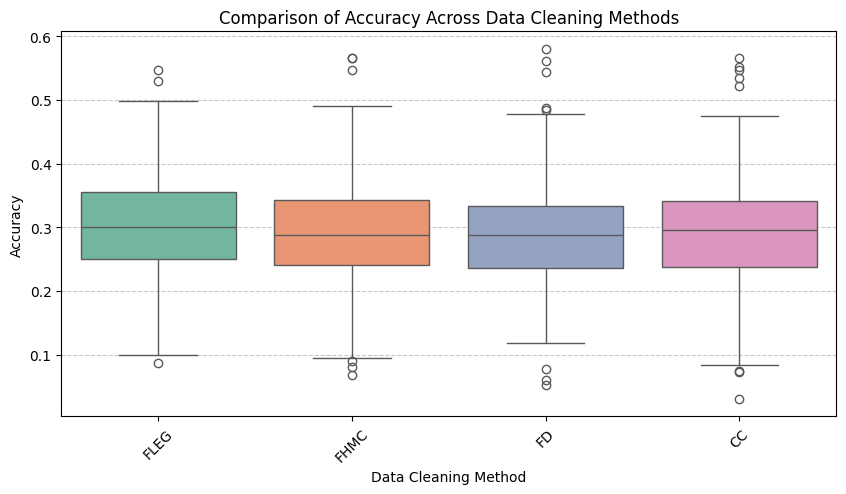

In [25]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "Accuracy")

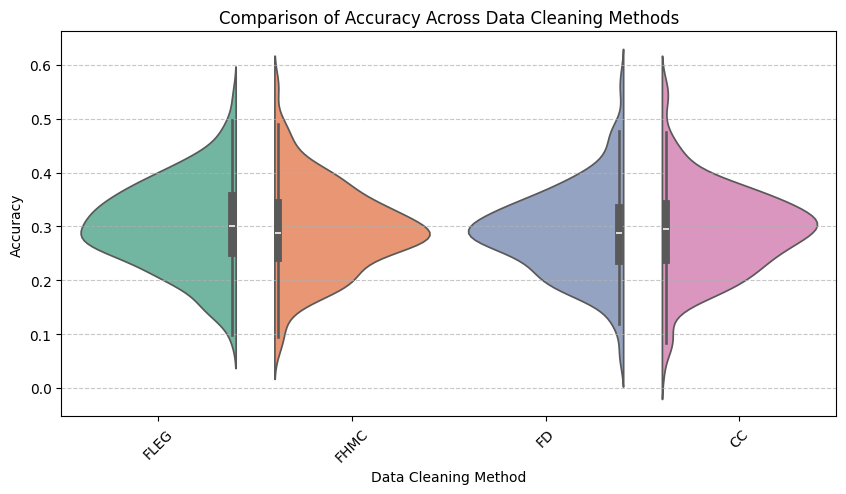

In [29]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "Accuracy", "violin")

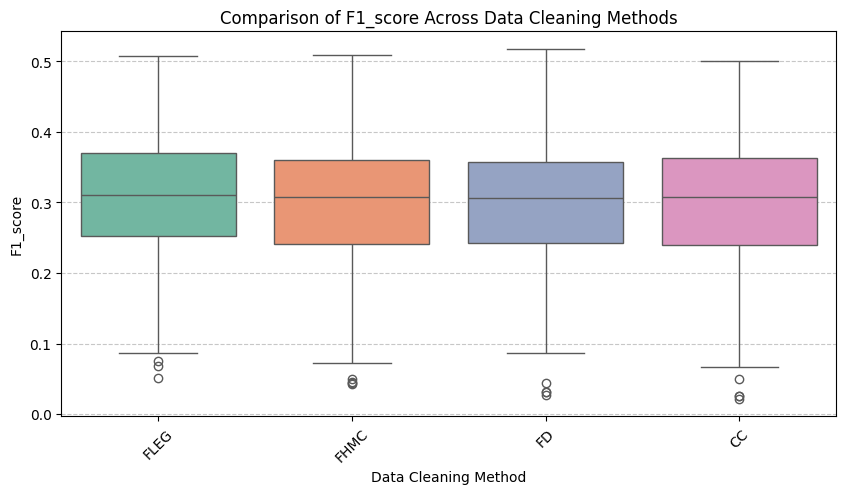

In [26]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "F1_score")

In [27]:
reload(visualization)
normalization_methods = ['CPM', 'QR', 'NB']
step_position = 1

filtered_results_norm = visualization.filter_by_step(filtered_barcode_length, normalization_methods, step_position)
print(filtered_results_norm.keys())

dict_keys(['CPM', 'QR', 'NB'])


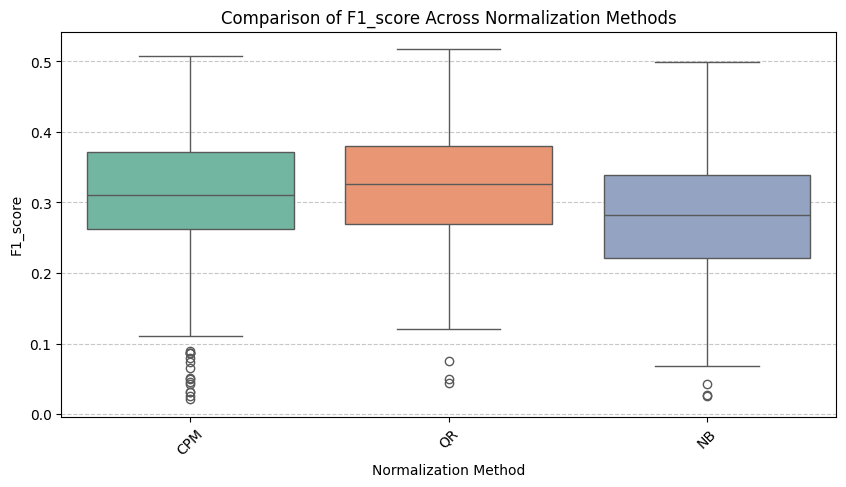

In [28]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_norm, "Normalization", "F1_score")

In [30]:
reload(visualization)
only_metrics = visualization.filter_metrics(filtered_barcode_length)
print(only_metrics.head())

                  pipeline_id  Silhouette_Score  Davies_Bouldin_Index  \
0   FLEG_CPM_SHVG_PCA_GBC_RBA          0.125175              1.436193   
1   FLEG_CPM_SHVG_PCA_GBC_CBA          0.125175              1.436193   
2   FLEG_CPM_SHVG_PCA_GBC_MBA          0.125175              1.436193   
3  FLEG_CPM_SHVG_PCA_DiBC_RBA          0.140337              1.485316   
4  FLEG_CPM_SHVG_PCA_DiBC_CBA          0.140337              1.485316   

   Calinski_Harabasz_Score  ARI  NMI  V_measure  Accuracy  Precision  \
0              8886.548710  1.0  1.0        1.0  0.362866   0.466590   
1              8886.548710  1.0  1.0        1.0  0.399364   0.484784   
2              8886.548710  1.0  1.0        1.0  0.392861   0.466804   
3             12076.376726  1.0  1.0        1.0  0.329795   0.504407   
4             12076.376726  1.0  1.0        1.0  0.380131   0.481588   

     Recall  F1_score  
0  0.362866  0.338632  
1  0.399364  0.380556  
2  0.392861  0.384483  
3  0.329795  0.379279  
4  0.380

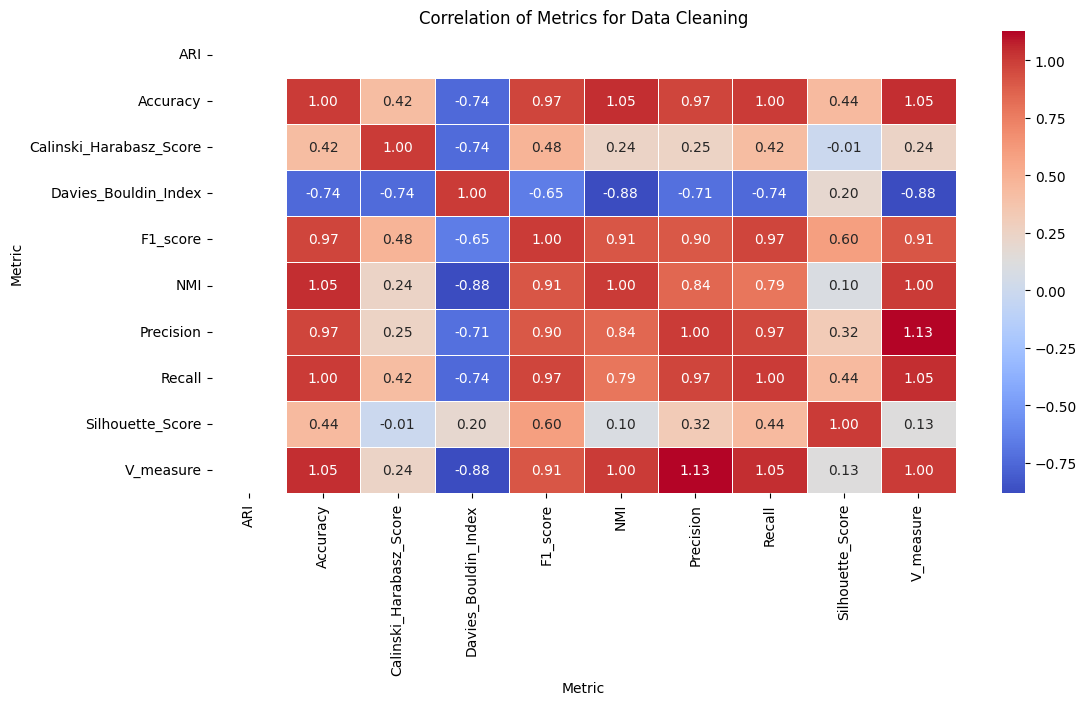

In [33]:
reload(visualization)
only_metrics_cleaning = visualization.filter_metrics_by_step(filtered_results_cleaning)
visualization.plot_heatmap_by_step(only_metrics_cleaning, "Data Cleaning")

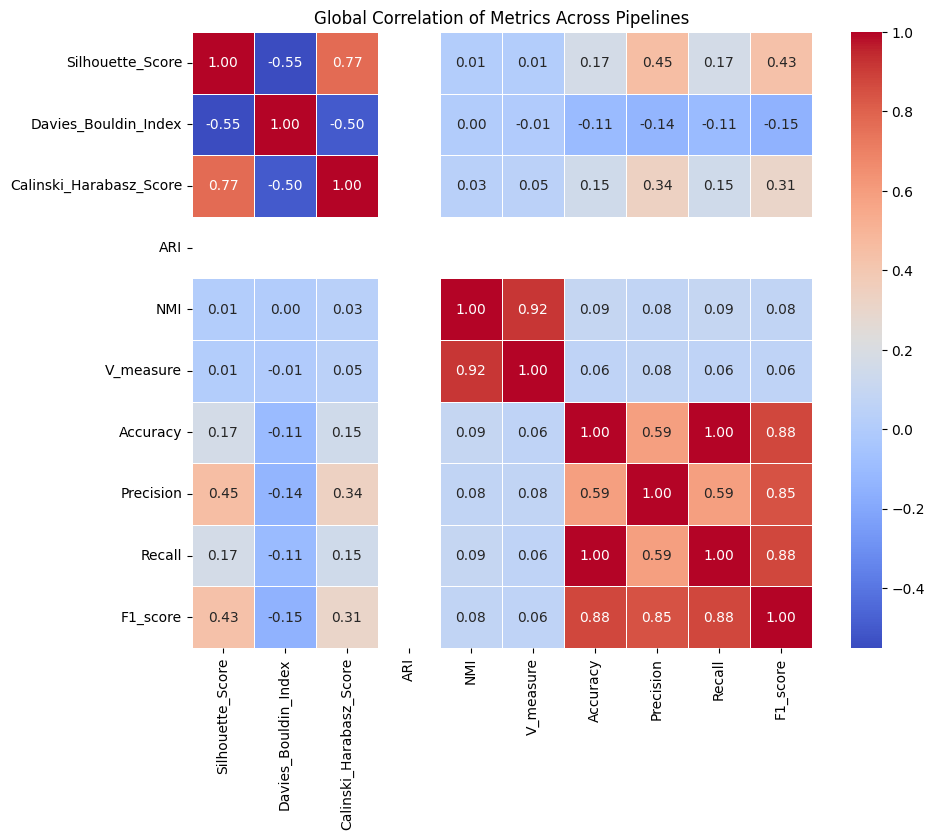

In [31]:
reload(visualization)
visualization.plot_global_heatmap(only_metrics)

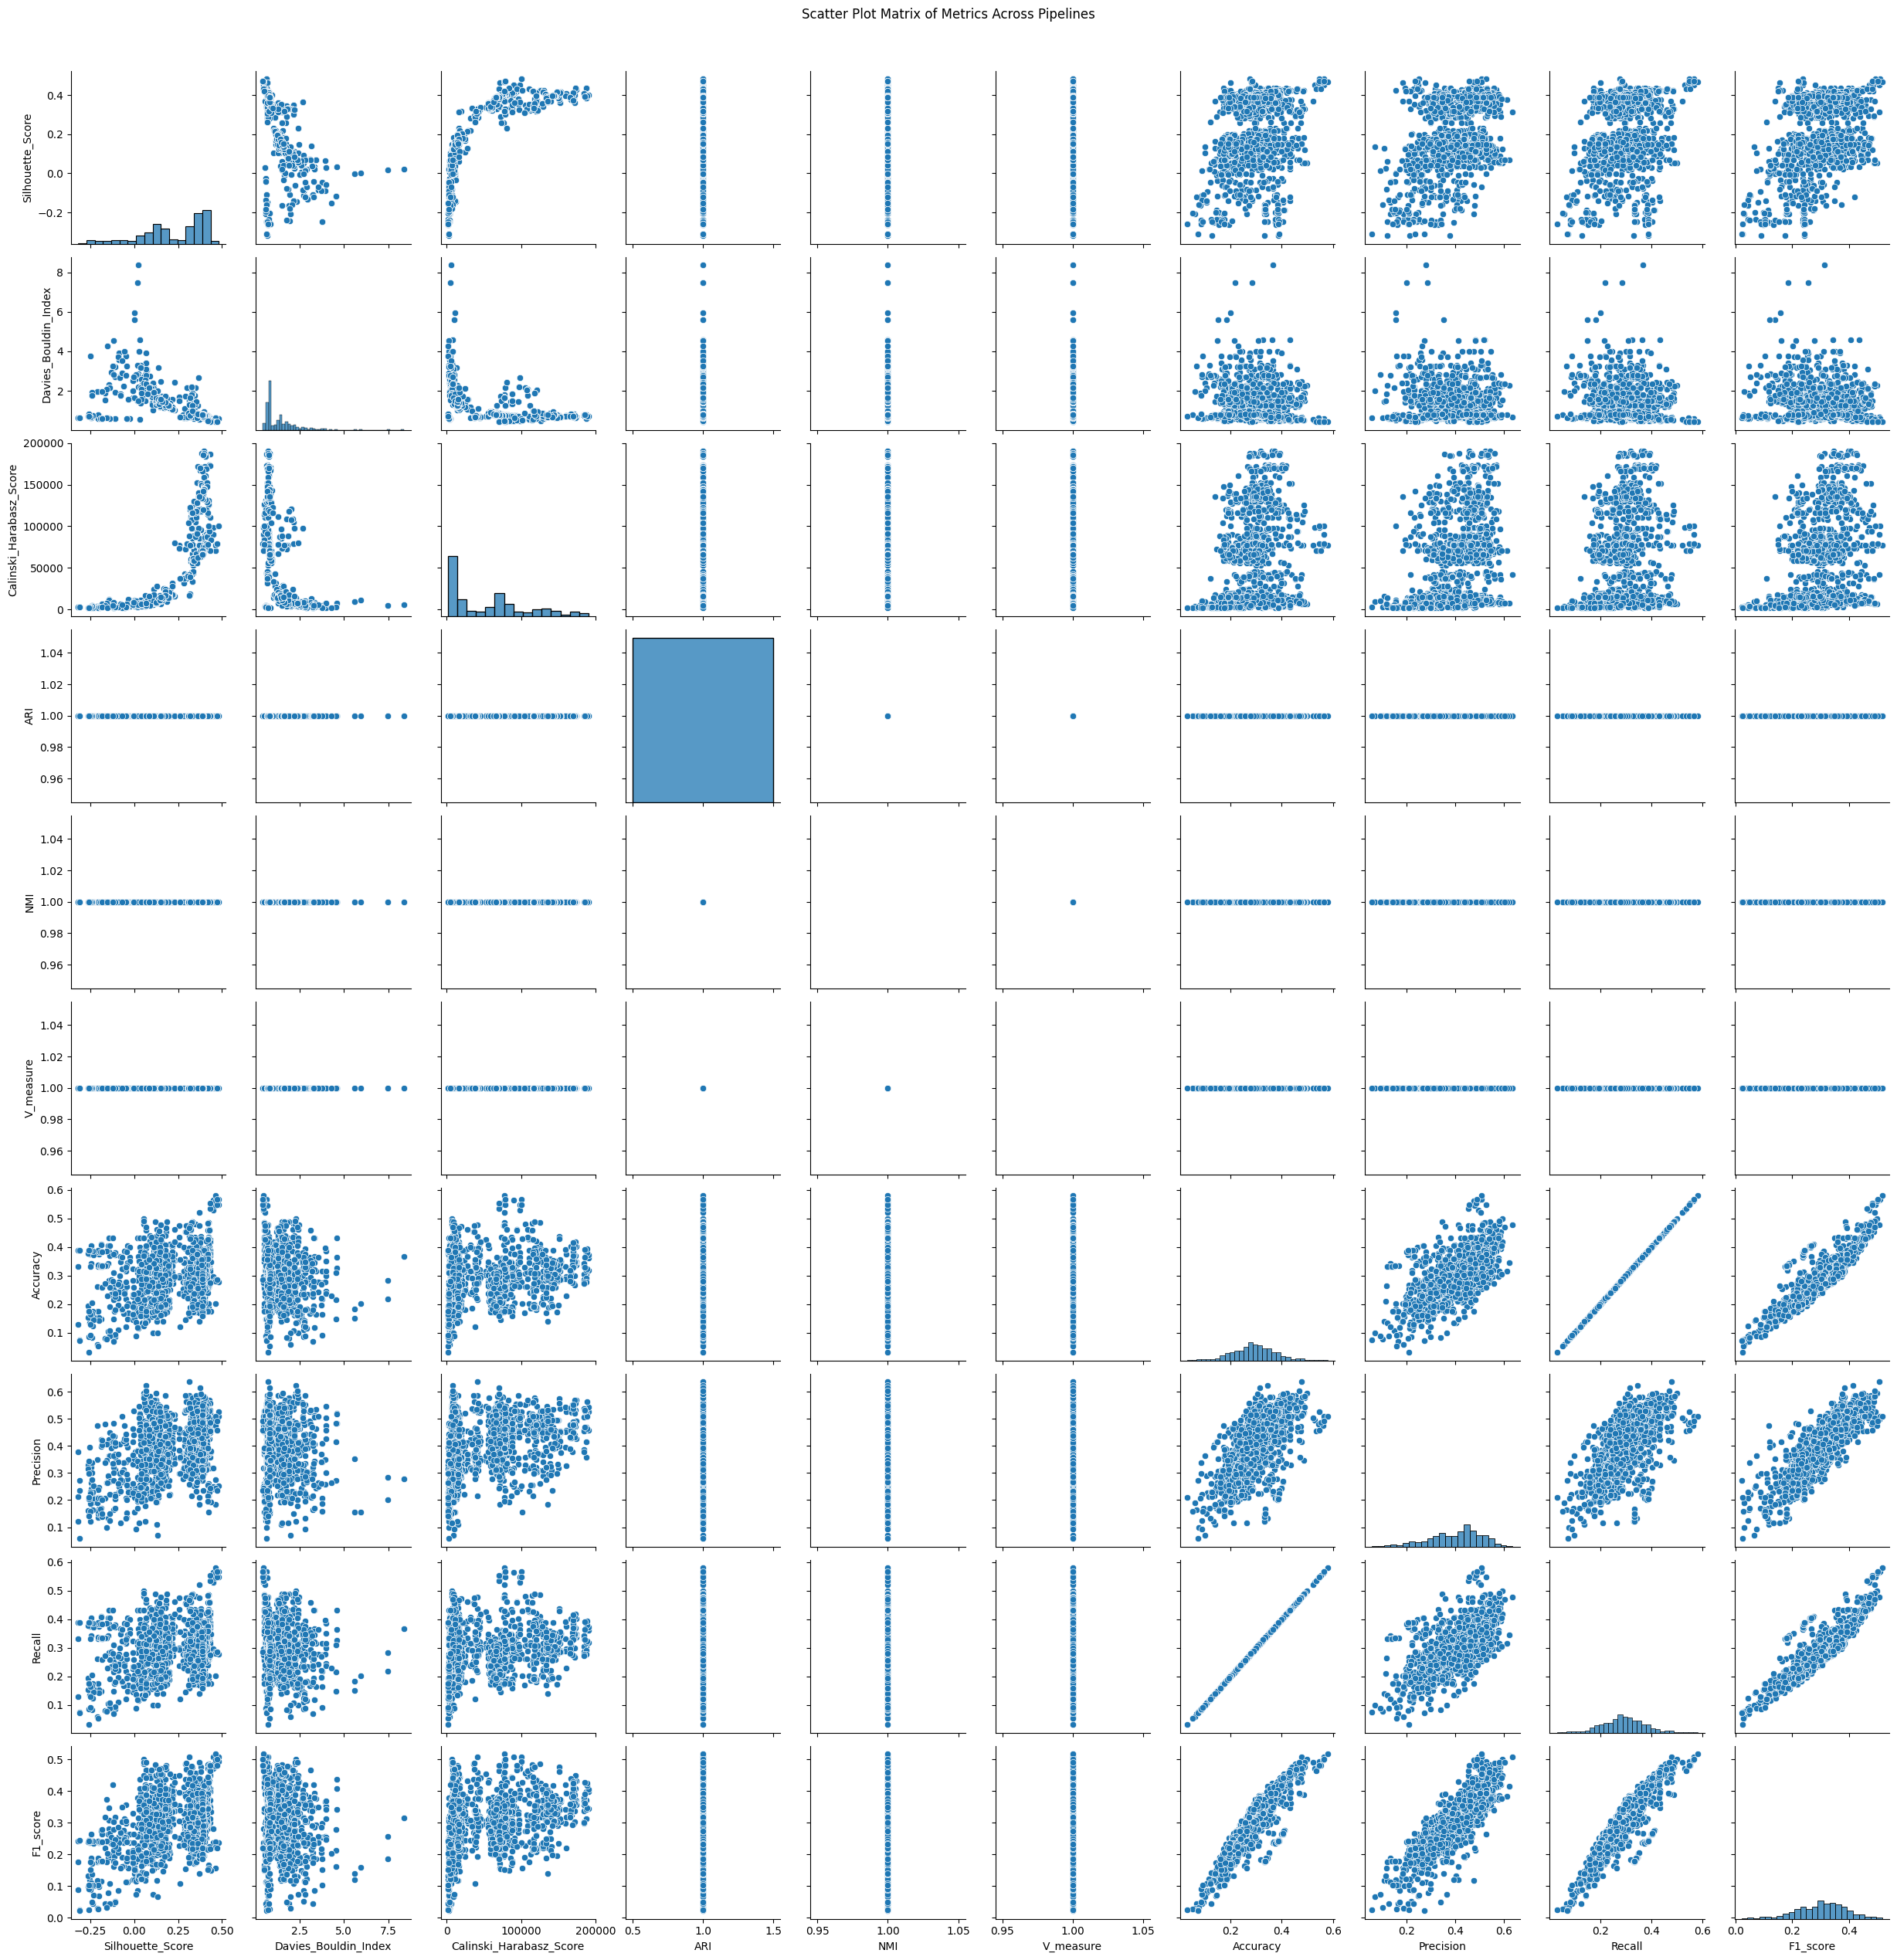

In [32]:
reload(visualization)
visualization.plot_global_scatter(only_metrics)